https://stepik.org/lesson/1576177/step/4

Parameter containing:
tensor([[ 0.1299,  0.0851, -0.0054]], requires_grad=True) Parameter containing:
tensor([0.2216], requires_grad=True)


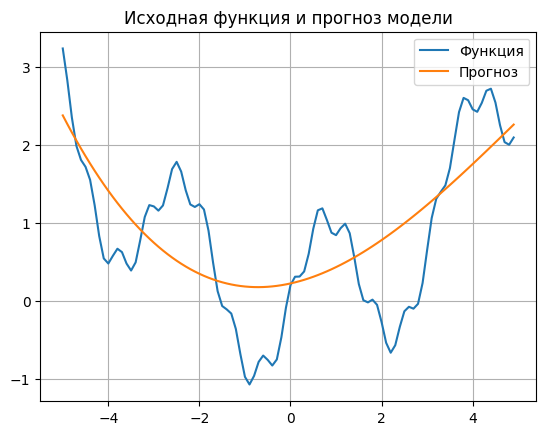

In [ ]:
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.optim as optim

f = lambda x: torch.sin(2 * x) + 0.2 * torch.cos(10 * x) + 0.1 * x**2

class FuncDataset(data.Dataset):
    def __init__(self):
        _x = torch.arange(-5, 5, 0.1)
        self.data = _x
        self.target = torch.sin(2 * _x) + 0.2 * torch.cos(10 * _x) + 0.1 * _x**2
        self.length = len(_x)

    def __getitem__(self, item):
        return self.data[item], self.target[item]

    def __len__(self):
        return self.length


class FuncModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(3, 1)

    def forward(self, x):
        xx = torch.empty(x.size(0), 3)
        xx[:, 0] = x
        xx[:, 1] = x ** 2
        xx[:, 2] = x ** 3
        y = self.layer1(xx)
        return y


torch.manual_seed(1)

# Создание модели FuncModel и перевод в режим обучения
model = FuncModel()
model.train()

# Параметры градиентного спуска
epochs = 20     # число эпох обучения
batch_size = 8  # размер батча
lr = 0.01

# Создание объекта с разбиением на батчи
d_train = FuncDataset()
train_data = data.DataLoader(d_train, batch_size, shuffle=True, drop_last=False)

# Оптимизатор и функция потерь
optimizer = optim.Adam(params=model.parameters(), lr=lr)
loss_func = torch.nn.MSELoss()

# Градиентный спуск
for _ in range(epochs):
    for x_train, y_train in train_data:
        predict = model(x_train).squeeze()
        loss = loss_func(predict, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Перевод модели в режим эксплуатации
model.eval()

# Прогноз модели по всем данным выборки
y_pred = model(d_train.data)

# Качество
Q = loss_func(y_pred.data.squeeze(), d_train.target).item()

# Вычисленные параметры многочлена (веса и смещение)
print(*model.parameters())

# График
import matplotlib.pyplot as plt

plt.plot(d_train.data, d_train.target, label='Функция')
plt.plot(d_train.data, y_pred.detach(), label='Прогноз')
plt.legend()
plt.title('Исходная функция и прогноз модели')
plt.grid()
plt.show()